## IMPORTING THE DEPENDENCIES

In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
import os
import pandas as pd
import numpy as np

## DEFINING THE DIRECTORIES

In [2]:
TRAIN_DIR ='images/train'
TEST_DIR ='images/test'

## CREATING A DATAFRAME FUNCTION

In [3]:
def createdataframe(dir): 
    image_paths=[]
    labels =[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")  
    return image_paths,labels    

## CLEANING AND CHECKING THE DATAFRAME

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


## FUNCTION FOR EXTRACTING FEATURES AND LOADING & CONVERTING THE IMAGES

In [8]:
#data preprocessing
from tqdm.notebook import tqdm
import cv2

In [9]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
        

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

## SPLIT INTO TRAIN / TEST

In [12]:
#supervised learning and label creation
x_train =train_features/255.0
x_test =test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
#Encoding the labels
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes=7) #Updating classes , preparing for testing
y_test = to_categorical(y_test,num_classes=7)

## CNN ARCHITECTURE

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\Subhayam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.compile(optimizer ='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

## MODEL FITTING (MODEL TRAINING)


In [19]:
model.fit(x=x_train,y=y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 660s 3s/step - accuracy: 0.2326 - loss: 1.8429 - val_accuracy: 0.2583 - val_loss: 1.8147
Epoch 2/100
 12/226 ━━━━━━━━━━━━━━━━━━━━ 9:12 3s/step - accuracy: 0.2198 - loss: 1.8307

KeyboardInterrupt: 

## SAVING THE MODEL

In [21]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

## LOADING AND IMPORTING THE MODEL

In [20]:
from keras.models import model_from_json

In [21]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

## LABELING & PREPROCESSING

In [22]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [23]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [24]:
def ef(image, target_size=(48, 48)): 
    img = load_img(image, target_size=target_size) 
    if grayscale:
        img = tf.cast(img, tf.float32)  # Cast to float32 for calculations
        r, g, b = tf.split(img, 3, axis=-1)  # Split RGB channels
        gray = 0.299 * r + 0.587 * g + 0.114 * b  # Grayscale conversion (float32)
        img = tf.cast(gray, tf.uint8)  # Cast back to uint8 for consistency
    else:
        img = tf.cast(img, tf.float32) / 255.0 
    feature = np.array(img)
    feature = feature.reshape(1, *target_size, 1)
    return feature / 255.0 

## PREDICTION AND OUTCOME

In [25]:
grayscale = True
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
model prediction is  sad


## IMAGE DISPLAY AND VERIFICATION

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
model prediction is  sad


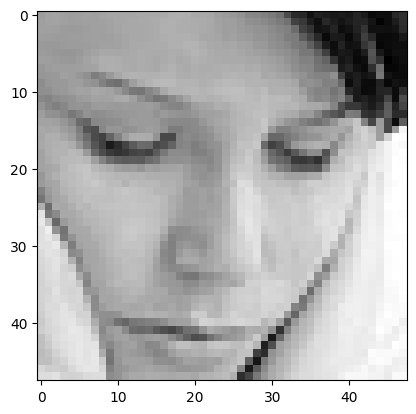

In [27]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
model prediction is  fear


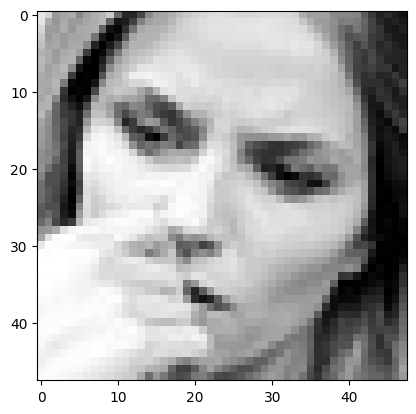

In [28]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
model prediction is  disgust


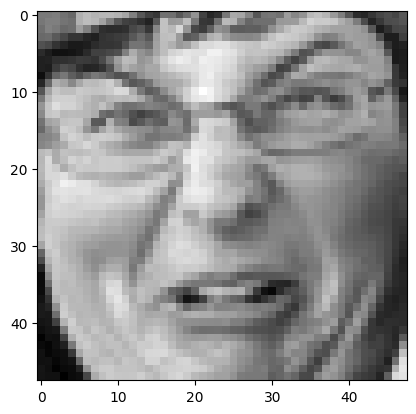

In [29]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
model prediction is  happy


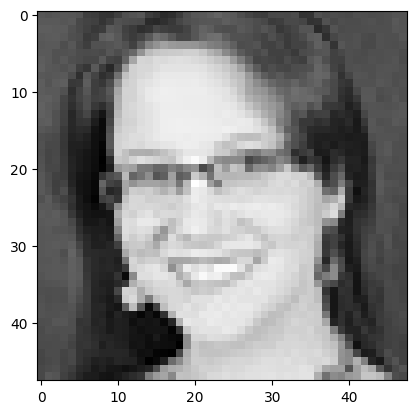

In [30]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
model prediction is  surprise


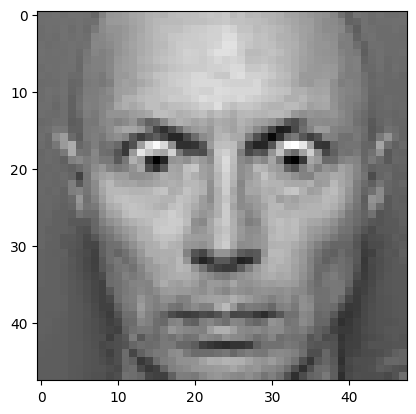

In [31]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')